In [1]:
from vcat import ImageCube
import glob

#general settings:
useDIFMAP=True

Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....


In [2]:
#Import Multi-Epoch, Multi-Frequency Data as an ImageCube
fits_files=glob.glob("../dataset_example/0235+164/**/*.icn.fits",recursive=True)
uvf_files=glob.glob("../dataset_example/0235+164/**/*.uvf",recursive=True)
stokes_q_files=glob.glob("../dataset_example/0235+164/**/*.qcn.fits",recursive=True)
stokes_u_files=glob.glob("../dataset_example/0235+164/**/*.ucn.fits",recursive=True)

#Import the data as an ImageCube
#import data
im_cube=ImageCube().import_files(fits_files=fits_files,
                                 uvf_files=uvf_files,
                                 stokes_q_files=stokes_q_files,
                                 stokes_u_files=stokes_u_files)

#print basic info
print(im_cube)

Importing images:
Progress: 100.0%
Imported 6 images successfully. 
ImageCube for source 0235+164 with 3 frequencies and 2 epochs.
Frequencies [GHz]: 15 GHz, 24 GHz, 43 GHz
Epochs: 2022-08-01, 2022-08-19


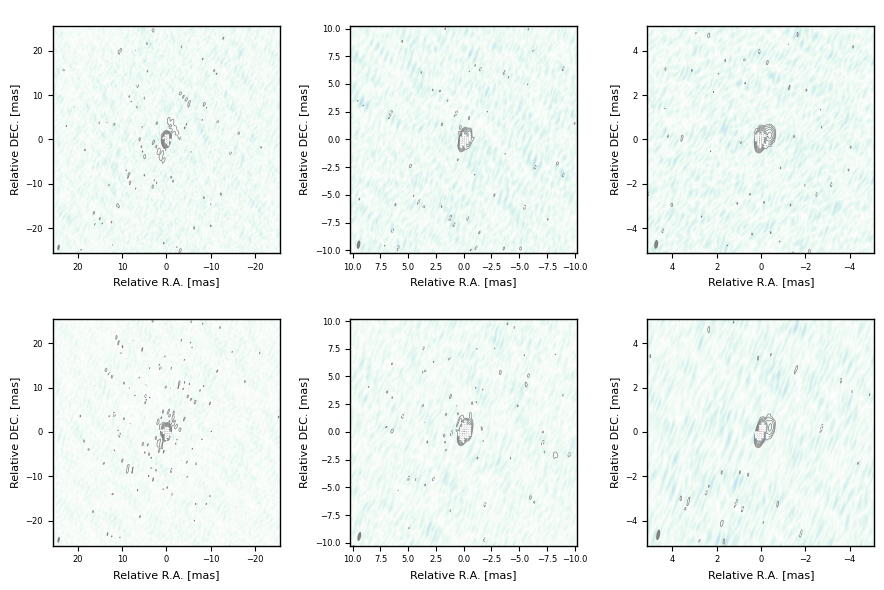

In [5]:
#Create plot of the data
im_cube.plot(plot_mode="lin_pol",plot_evpa=True)

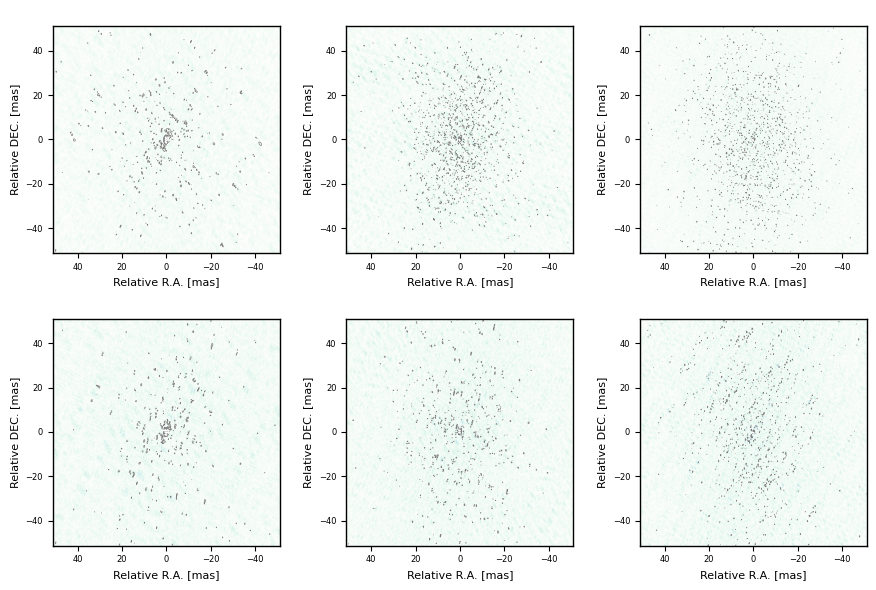

In [7]:
#You now have different operations available to apply directly to the ImageCube

#Let's start by regridding all images to the same grid
im_cube=im_cube.regrid(mode="all",npix=1024,pixel_size=0.1,useDIFMAP=useDIFMAP)

#plot the result
im_cube.plot(plot_mode="lin_pol",plot_evpa=True)

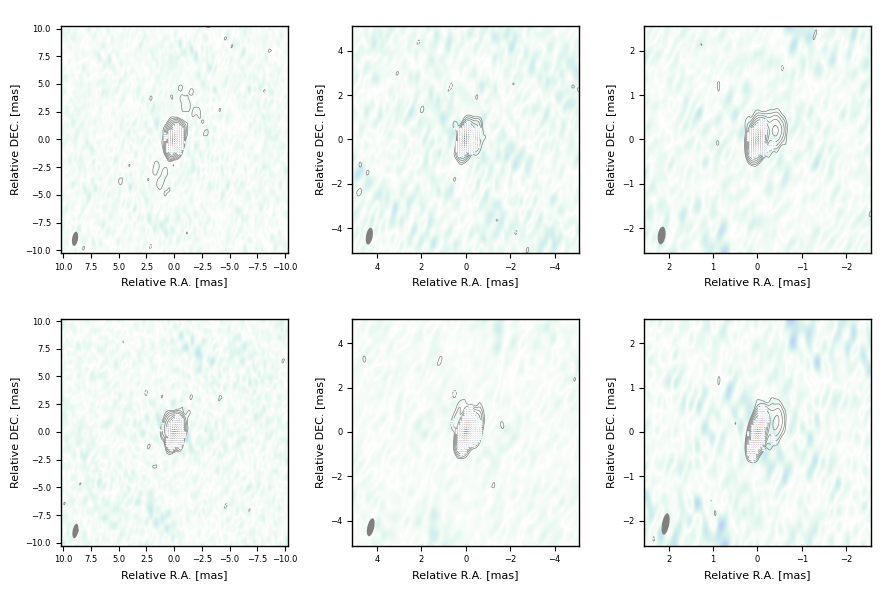

In [10]:
#This doesn't look too good, but you can choose a custom grid per epoch or frequency
#Let's try this
im_cube=im_cube.regrid(mode="freq",npix=[1024,1024,1024],pixel_size=[0.02,0.01,0.005],useDIFMAP=useDIFMAP)

#plot the result
im_cube.plot(plot_mode="lin_pol",plot_evpa=True)

common beam calculated: [1.3631989352736702, 0.44907048123807125, -16.250367068888796]
common beam calculated: [0.8667422281956989, 0.24212613222297197, -18.361663128738368]
common beam calculated: [0.49839707907446534, 0.14892533760869064, -14.796242452338827]


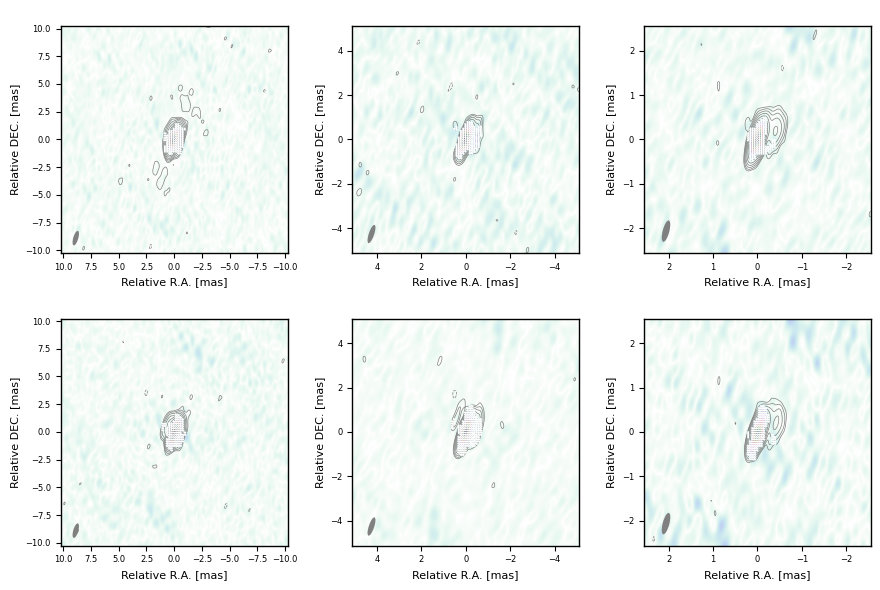

In [13]:
#You can also easily restore the images with a common beam
im_cube=im_cube.restore(mode="freq",useDIFMAP=useDIFMAP)

#plot the result
im_cube.plot(plot_mode="lin_pol",plot_evpa=True)

common beam calculated: [1.3859837783115916, 0.37245453810684814, -19.19256366586202]
common beam calculated: [1.3859837783115916, 0.37245453810684814, -19.19256366586202]


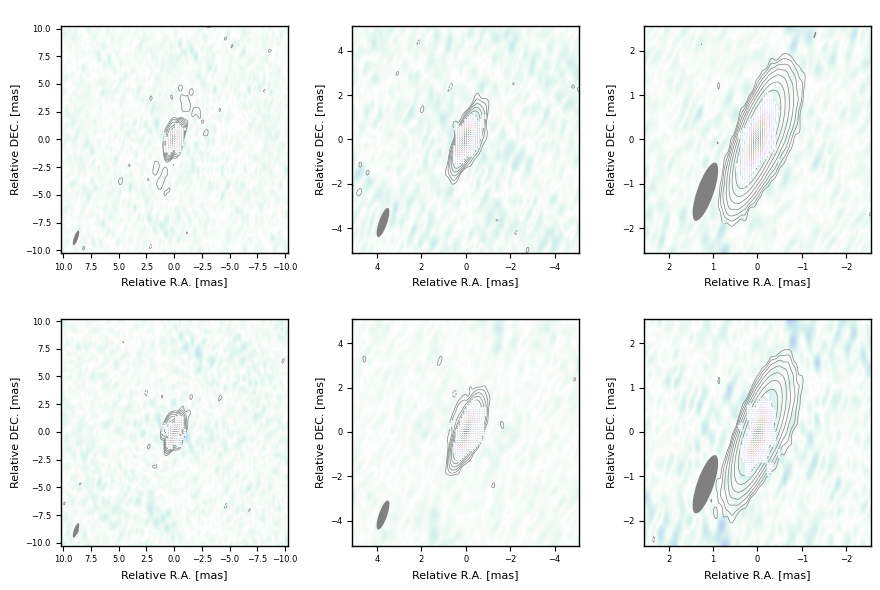

In [14]:
#As you can see, this setting used a seperate common beam per frequency. 
#If you use mode="all" the common beam will be calculated for all images
#If you use mode="epoch" the common beam will be calculated for each epoch like so:
im_cube=im_cube.restore(mode="epoch",useDIFMAP=useDIFMAP)

#plot the result
im_cube.plot(plot_mode="lin_pol",plot_evpa=True)